In [22]:
import utils
from deepchem import deepchem as dc
from deepchem.models import AttentiveFPModel

In [12]:
utils.set_seed(50, tensorflow=False, pytorch=True)

In [13]:
data = utils.load_data('ABC_smiles_data.csv', 600, True)

In [14]:
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
train_data, valid_data, test_data, transformer = utils.receptor_data(data, 'BCRP', featurizer)

In [15]:
metric = dc.metrics.Metric(dc.metrics.rms_score)

model = AttentiveFPModel(
    n_tasks=1,
    mode='regression'
)

train_model = utils.fit_best_model(model, train_data, valid_data, [metric], [transformer])

Epoch 1/100
{'rms_score': 2.3456919703221755}
Epoch 2/100
{'rms_score': 2.072903327458714}
Epoch 3/100
{'rms_score': 1.9686066078638143}
Epoch 4/100
{'rms_score': 1.7721365891358205}
Epoch 5/100
{'rms_score': 1.6912100600366653}
Epoch 6/100
{'rms_score': 1.7020577420037861}
Epoch 7/100
{'rms_score': 1.6774205358752774}
Epoch 8/100
{'rms_score': 1.5626039102582328}
Epoch 9/100
{'rms_score': 1.5012592017296444}
Epoch 10/100
{'rms_score': 1.463278550076737}
Epoch 11/100
{'rms_score': 1.686551297522411}
Epoch 12/100
{'rms_score': 1.5559745144189792}
Epoch 13/100
{'rms_score': 1.3868753351688254}
Epoch 14/100
{'rms_score': 1.4003063266252473}
Epoch 15/100
{'rms_score': 1.3567263206185958}
Epoch 16/100
{'rms_score': 1.3517440045971005}
Epoch 17/100
{'rms_score': 1.3396075528806104}
Epoch 18/100
{'rms_score': 1.3701135631743042}
Epoch 19/100
{'rms_score': 1.3541421887476817}
Epoch 20/100
{'rms_score': 1.389279681075864}
Early stopping triggered at epoch: 20
Best model found at epoch 17 with r

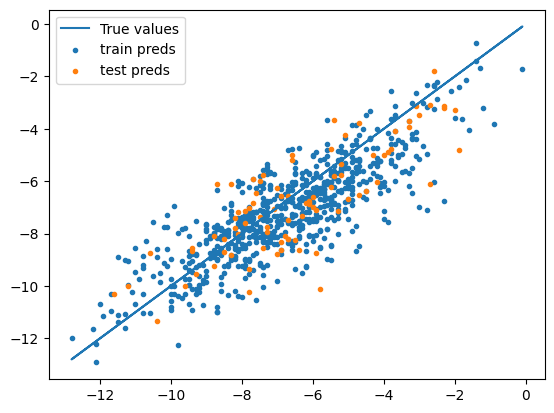

In [16]:
utils.plot_predictions(model, train_data, test_data, transformer)

In [17]:
R2 = dc.metrics.Metric(dc.metrics.r2_score)
model.evaluate(valid_data, [R2], [transformer])

{'r2_score': 0.6391720031312306}

In [18]:
def plot_validation(trained_model):
    from matplotlib import pyplot as plt
    
    epochs = [x[0] for x in trained_model]
    valid_scores = [x[1] for x in trained_model]
    train_scores = [x[2] for x in trained_model]

    plt.plot(epochs, train_scores, label='Training')
    plt.plot(epochs, valid_scores, label='Validation')
    plt.gca().set(xlabel='Epochs', ylabel=metric.name, title='Validation')
    plt.xticks(range(min(epochs), max(epochs) + 1, 4))
    plt.legend()
    plt.show


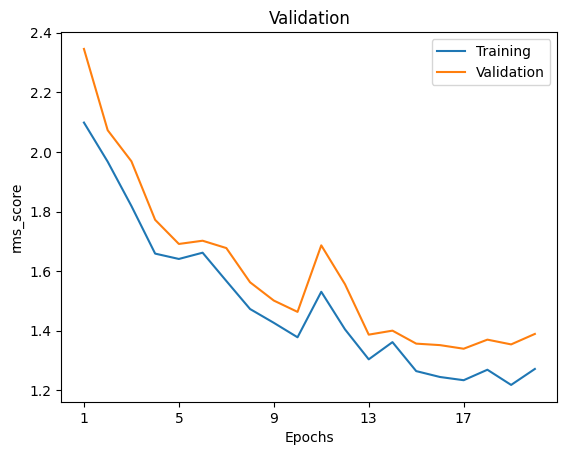

In [24]:
plot_validation(train_model)